In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Algerian_forest_fires_dataset.csv')

In [3]:
df.head(2)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire


In [4]:
df['day'].unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31', nan,
       'Sidi-Bel Abbes Region Dataset', 'day'], dtype=object)

# data cleaning

In [5]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [6]:
df.loc[:122,'region']=0
df.loc[122:,'region']=1

In [7]:
df.head(2)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0


In [8]:
df.tail(2)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
245,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1.0
246,30,9,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire,1.0


In [9]:
df[['region']]=df[['region']].astype(int)

In [10]:
df.isnull().sum()

day            1
month          2
year           2
Temperature    2
 RH            2
 Ws            2
Rain           2
FFMC           2
DMC            2
DC             2
ISI            2
BUI            2
FWI            2
Classes        3
region         0
dtype: int64

In [11]:
df=df.dropna()

In [12]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
region         0
dtype: int64

In [13]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
124,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1


In [14]:
df = df.drop(124).reset_index(drop=True)

In [15]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
122,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1


In [16]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1
239,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [17]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'region'],
      dtype='object')

In [18]:
df.columns=df.columns.str.strip()

In [19]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'region'],
      dtype='object')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    object
 1   month        243 non-null    object
 2   year         243 non-null    object
 3   Temperature  243 non-null    object
 4   RH           243 non-null    object
 5   Ws           243 non-null    object
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  region       243 non-null    int32 
dtypes: int32(1), object(14)
memory usage: 27.7+ KB


In [21]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'region'],
      dtype='object')

In [22]:
df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']]=df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']].astype(int)

In [23]:
floatobj = [feature for feature in df.columns if df[feature].dtype=='O']

In [24]:
floatobj

['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']

In [25]:
for i in floatobj:
    if i!='Classes':
        df[i]=df[i].astype(float)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int32  
 1   month        243 non-null    int32  
 2   year         243 non-null    int32  
 3   Temperature  243 non-null    int32  
 4   RH           243 non-null    int32  
 5   Ws           243 non-null    int32  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  region       243 non-null    int32  
dtypes: float64(7), int32(7), object(1)
memory usage: 22.0+ KB


In [27]:
df.to_csv('Updated_algerianffd.csv',index=None)

# eda

In [28]:
df_copy = df.drop(['day','month','year'],axis=1)

In [29]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [30]:
df_copy['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

In [31]:
df_copy['Classes']=df_copy['Classes'].str.strip()

In [32]:
df_copy['Classes'].unique()

array(['not fire', 'fire'], dtype=object)

In [33]:
df_copy['Classes']=np.where(df_copy['Classes']=='not fire',0,1)

In [34]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [35]:
df_copy['Classes'].unique()

array([0, 1])

In [36]:
df_copy['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

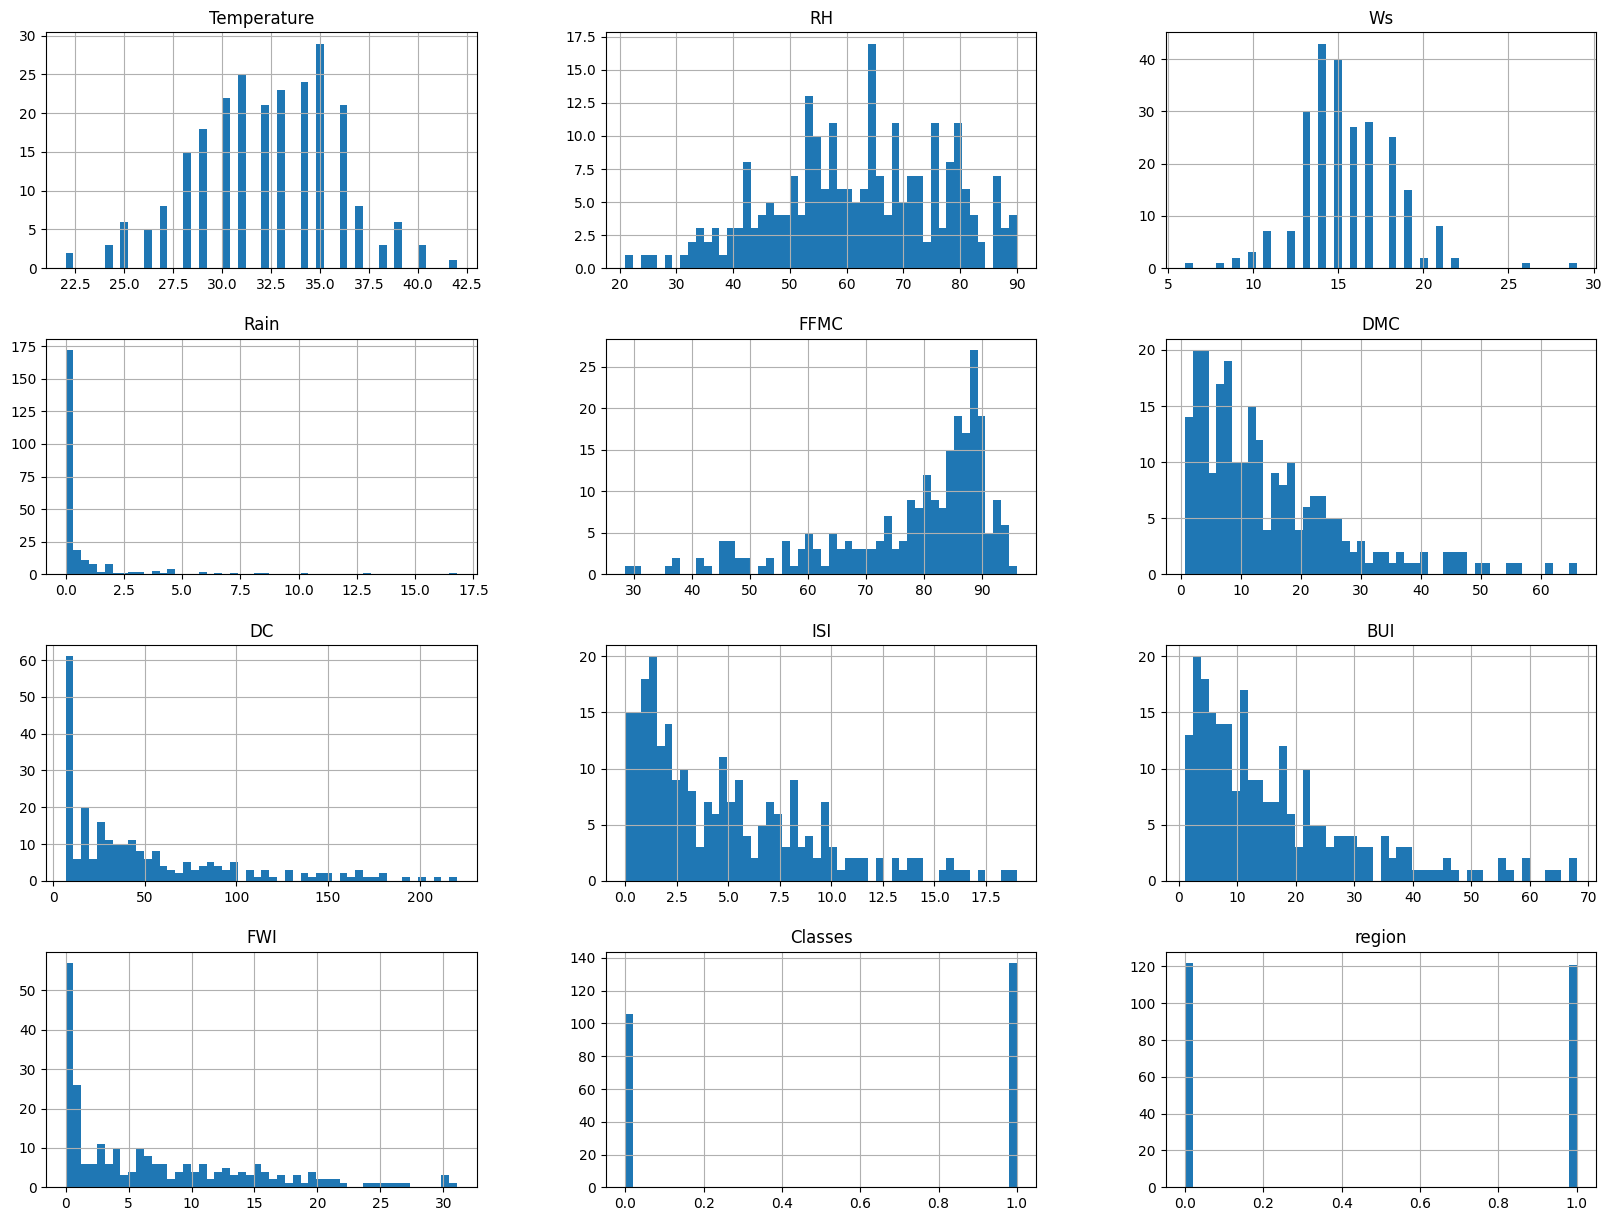

In [37]:

df_copy.hist(bins=50,figsize=(20,15))
plt.show()

In [38]:
perc = df_copy['Classes'].value_counts(normalize=True)*100


Text(0.5, 1.0, 'Pie chart of classes')

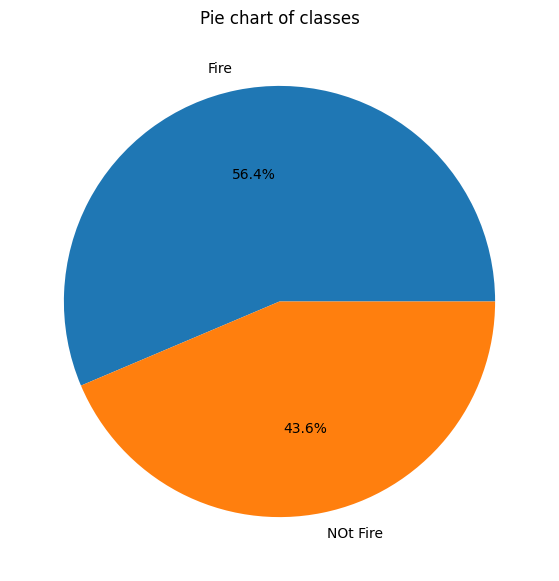

In [39]:
classlabels=['Fire','NOt Fire']
plt.figure(figsize=(12,7))
plt.pie(perc,labels=classlabels,autopct='%1.1f%%')
plt.title("Pie chart of classes")

<Axes: >

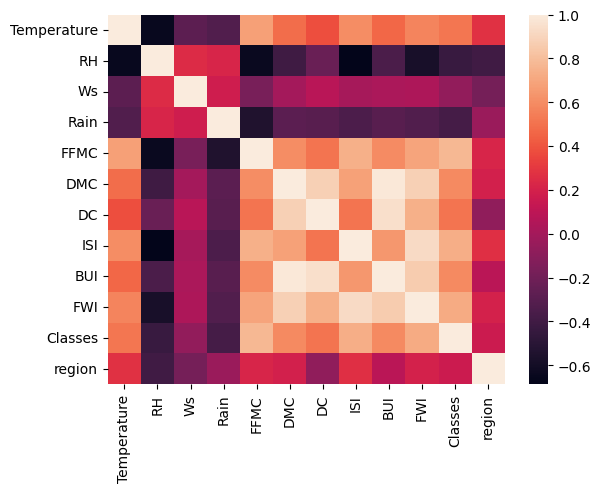

In [40]:
sns.heatmap(df_copy.corr())

{'whiskers': [<matplotlib.lines.Line2D at 0x19eba5807d0>,
 'caps': [<matplotlib.lines.Line2D at 0x19eba581b10>,
 'boxes': [<matplotlib.lines.Line2D at 0x19eba521850>],
 'medians': [<matplotlib.lines.Line2D at 0x19eba582b90>],
 'fliers': [<matplotlib.lines.Line2D at 0x19eba5833d0>],
 'means': []}

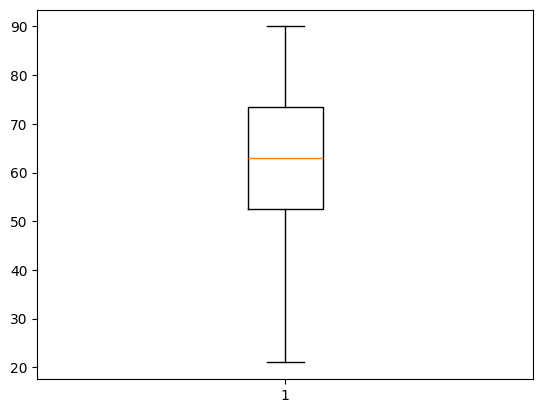

In [41]:
plt.boxplot(df_copy['RH'])

<Axes: >

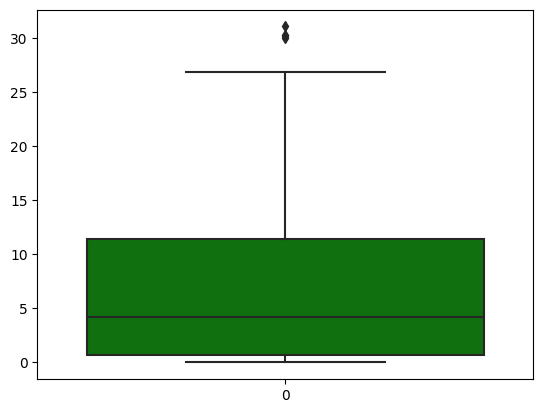

In [42]:
sns.boxplot(df_copy['FWI'],color='green')

<Axes: xlabel='month', ylabel='count'>

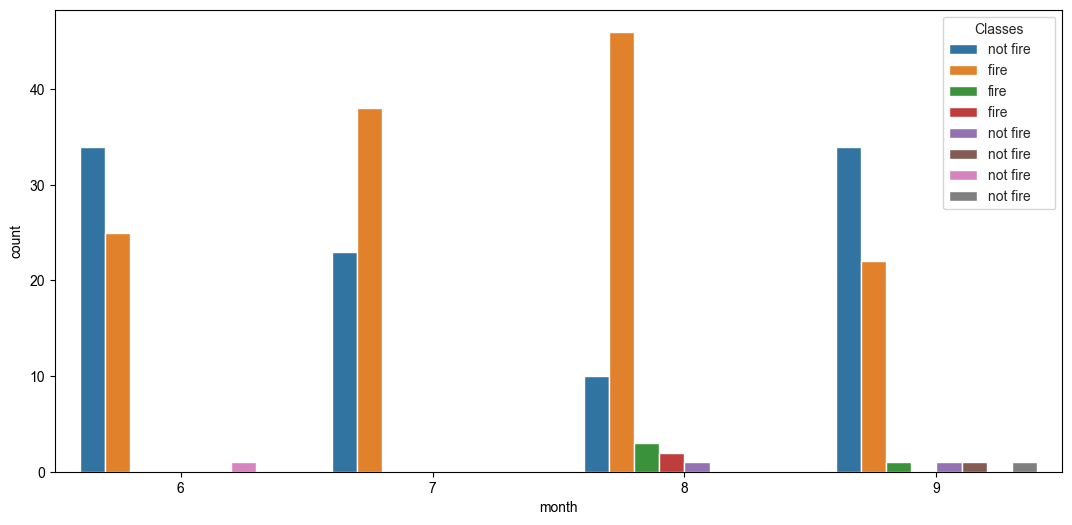

In [43]:
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=df)

# Feature Engineering


In [44]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  243 non-null    int32  
 1   RH           243 non-null    int32  
 2   Ws           243 non-null    int32  
 3   Rain         243 non-null    float64
 4   FFMC         243 non-null    float64
 5   DMC          243 non-null    float64
 6   DC           243 non-null    float64
 7   ISI          243 non-null    float64
 8   BUI          243 non-null    float64
 9   FWI          243 non-null    float64
 10  Classes      243 non-null    int32  
 11  region       243 non-null    int32  
dtypes: float64(7), int32(5)
memory usage: 18.2 KB


In [45]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [46]:
df_copy['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [47]:
# assigning value to dependent and indipendent features
y= df_copy['FWI']
x = df_copy.drop('FWI',axis=1)

In [48]:
x.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [49]:
# train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [50]:
x_train.shape

(182, 11)

In [51]:
x_test.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,region
24,31,64,15,0.0,86.7,14.2,63.8,5.7,18.3,1,0
6,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,1,0
152,28,58,18,2.2,63.7,3.2,8.5,1.2,3.3,0,1
232,34,58,13,0.2,79.5,18.7,88.0,2.1,24.4,0,1
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,1,1


<Axes: >

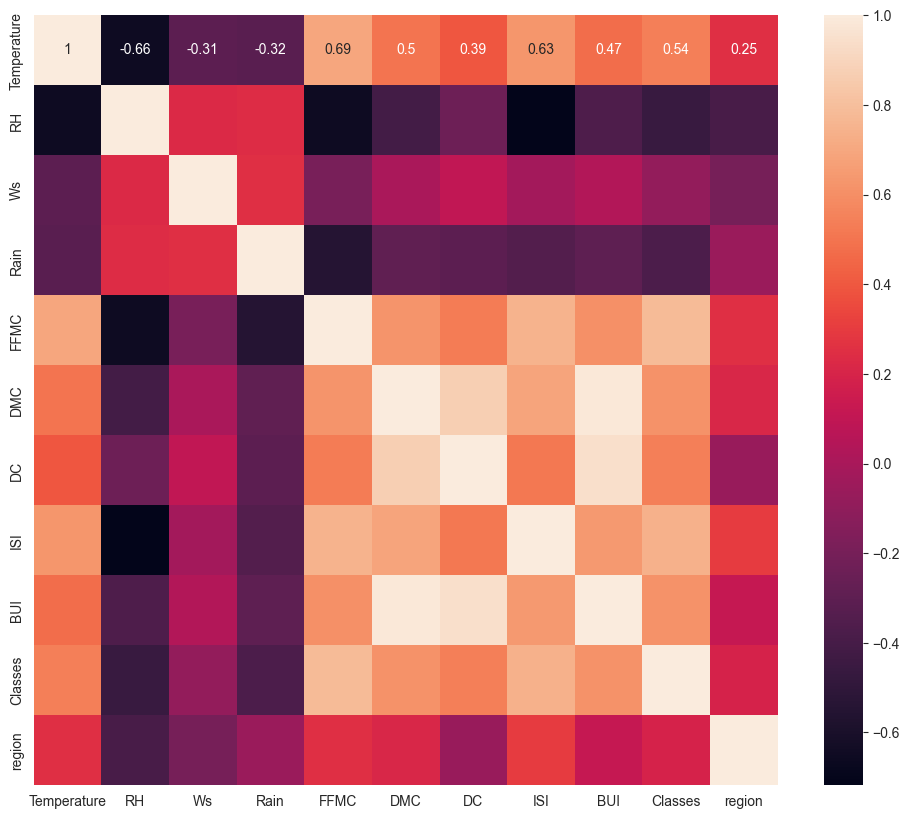

In [52]:
plt.figure(figsize=(12,10))
corr = x_train.corr()
sns.heatmap(corr,annot=True)

In [53]:
def correlation_col(data,theresold):
    col_corr= set()
    col_matrix=data.corr()
    for i in range(len(col_matrix.columns)):
        for j in range(i):
            if abs(col_matrix.iloc[i,j])>theresold:
                colname = col_matrix.columns[i]
                col_corr.add(colname)
                
    return col_corr



In [54]:
un_features = correlation_col(x_train,0.85)

In [55]:
un_features


{'BUI', 'DC'}

In [56]:
x_train.drop(un_features,inplace=True,axis=1)
x_test.drop(un_features,inplace=True,axis=1)

In [57]:
x_train

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes,region
97,29,74,19,0.1,75.8,3.6,2.1,0,0
141,31,72,14,0.2,60.2,3.8,0.8,0,1
192,40,31,15,0.0,94.2,22.5,16.6,1,1
68,32,60,18,0.3,77.1,11.3,2.2,0,0
119,32,47,14,0.7,77.5,7.1,1.8,0,0
...,...,...,...,...,...,...,...,...,...
106,24,82,15,0.4,44.9,0.9,0.2,0,0
14,28,80,17,3.1,49.4,3.0,0.4,0,0
92,25,76,17,7.2,46.0,1.3,0.2,0,0
179,34,59,16,0.0,88.1,19.5,7.4,1,1


In [58]:
x_test

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes,region
24,31,64,15,0.0,86.7,14.2,5.7,1,0
6,33,54,13,0.0,88.2,9.9,6.4,1,0
152,28,58,18,2.2,63.7,3.2,1.2,0,1
232,34,58,13,0.2,79.5,18.7,2.1,0,1
238,30,65,14,0.0,85.4,16.0,4.5,1,1
...,...,...,...,...,...,...,...,...,...
162,34,56,15,2.9,74.8,7.1,1.6,0,1
178,33,57,16,0.0,87.5,15.7,6.7,1,1
224,31,72,14,0.0,84.2,8.3,3.8,1,1
230,36,33,13,0.1,90.6,25.8,9.0,1,1


## standarization


In [59]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [60]:
x_train_scaled= scaler.fit_transform(x_train)


In [61]:
x_test_scaled = scaler.transform(x_test)

Text(0.5, 1.0, 'After scaling')

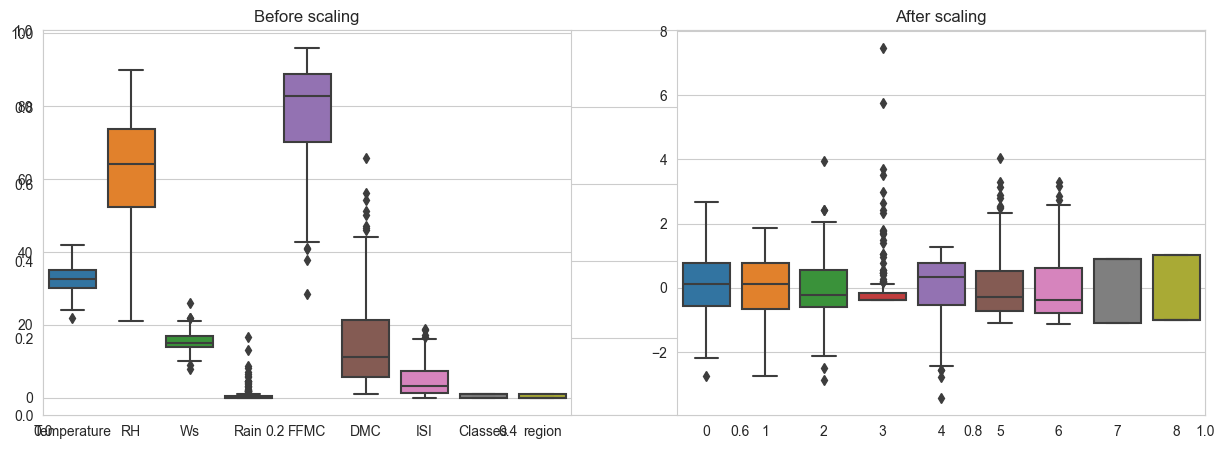

In [62]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=x_train)
plt.title("Before scaling")

plt.subplot(1,2,2)
sns.boxplot(data=x_train_scaled)
plt.title("After scaling")

## Linear Regression model

0.5468236465249993
0.9839977157632893


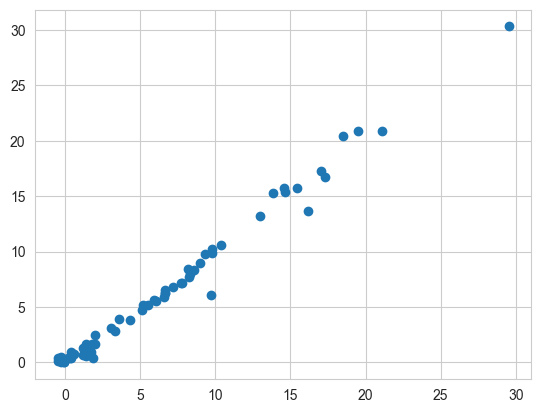

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score

slr= LinearRegression()
slr.fit(x_train_scaled,y_train)
y_pred= slr.predict(x_test_scaled)
mae= mean_absolute_error(y_pred,y_test)
lrscore = r2_score(y_pred,y_test)
print(mae)
print(lrscore)
plt.scatter(y_pred,y_test)

## Laso REgression

1.1331759949144085
0.9264742326805692


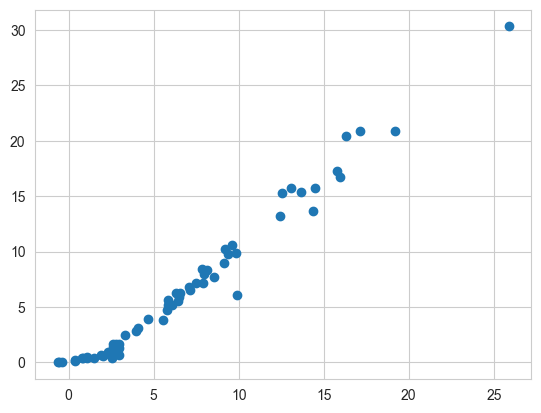

In [64]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error,r2_score

llr= Lasso()
llr.fit(x_train_scaled,y_train)
y_pred= llr.predict(x_test_scaled)
mae= mean_absolute_error(y_pred,y_test)
lrscore = r2_score(y_pred,y_test)
print(mae)
print(lrscore)
plt.scatter(y_pred,y_test)

## ridge regression

0.5642305340105715
0.9834070933284211


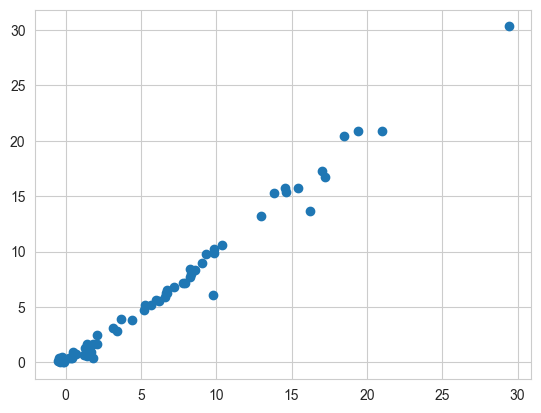

In [65]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error,r2_score

rlr= Ridge()
rlr.fit(x_train_scaled,y_train)
y_pred= rlr.predict(x_test_scaled)
mae= mean_absolute_error(y_pred,y_test)
lrscore = r2_score(y_pred,y_test)
print(mae)
print(lrscore)
plt.scatter(y_pred,y_test)

## ElasticNet regresion

1.8822353634896
0.7814447243400926


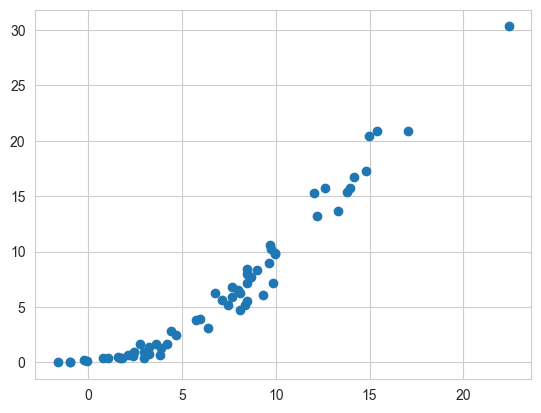

In [66]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error,r2_score

elr= ElasticNet()
elr.fit(x_train_scaled,y_train)
y_pred= elr.predict(x_test_scaled)
mae= mean_absolute_error(y_pred,y_test)
lrscore = r2_score(y_pred,y_test)
print(mae)
print(lrscore)
plt.scatter(y_pred,y_test)

## Cross validaton by LAssoCV

In [67]:
from sklearn.linear_model import LassoCV
lcv = LassoCV(cv=5)
lcv.fit(x_train_scaled,y_train)

LassoCV(cv=5)

In [68]:
lcv.alpha_

0.05725391318234405

In [69]:
lcv.alphas_

array([7.05853002e+00, 6.58280872e+00, 6.13914944e+00, 5.72539132e+00,
       5.33951911e+00, 4.97965339e+00, 4.64404142e+00, 4.33104857e+00,
       4.03915039e+00, 3.76692517e+00, 3.51304702e+00, 3.27627941e+00,
       3.05546914e+00, 2.84954075e+00, 2.65749124e+00, 2.47838523e+00,
       2.31135036e+00, 2.15557308e+00, 2.01029467e+00, 1.87480753e+00,
       1.74845178e+00, 1.63061198e+00, 1.52071419e+00, 1.41822315e+00,
       1.32263965e+00, 1.23349817e+00, 1.15036452e+00, 1.07283380e+00,
       1.00052839e+00, 9.33096128e-01, 8.70208572e-01, 8.11559427e-01,
       7.56863037e-01, 7.05853002e-01, 6.58280872e-01, 6.13914944e-01,
       5.72539132e-01, 5.33951911e-01, 4.97965339e-01, 4.64404142e-01,
       4.33104857e-01, 4.03915039e-01, 3.76692517e-01, 3.51304702e-01,
       3.27627941e-01, 3.05546914e-01, 2.84954075e-01, 2.65749124e-01,
       2.47838523e-01, 2.31135036e-01, 2.15557308e-01, 2.01029467e-01,
       1.87480753e-01, 1.74845178e-01, 1.63061198e-01, 1.52071419e-01,
      

In [70]:
lcv.intercept_

7.156043956043957

In [71]:
y_pred=lcv.predict(x_test_scaled)

0.6199701158263436
0.980851982434192


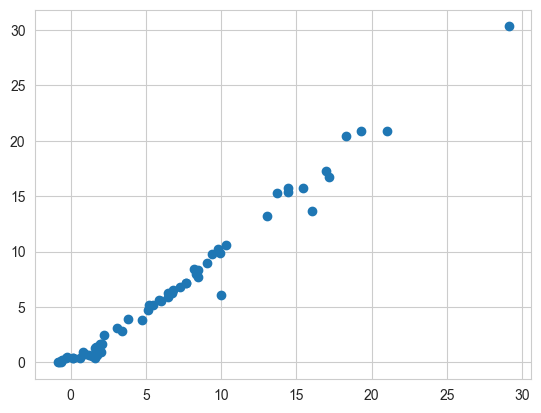

In [72]:
mae= mean_absolute_error(y_pred,y_test)
lrscore = r2_score(y_pred,y_test)
print(mae)
print(lrscore)
plt.scatter(y_pred,y_test)

0.5642305340106
0.9834070933284071


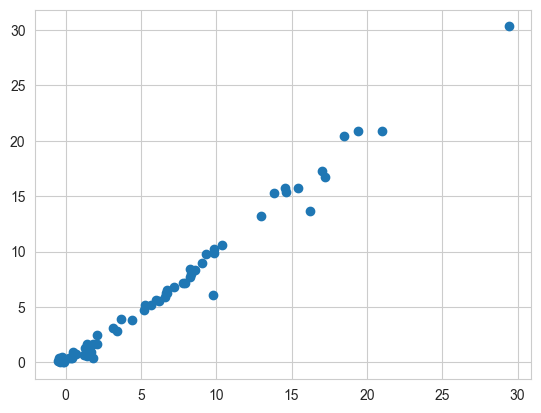

In [73]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_absolute_error,r2_score

rlrcv= RidgeCV()
rlrcv.fit(x_train_scaled,y_train)
y_pred= rlrcv.predict(x_test_scaled)
mae= mean_absolute_error(y_pred,y_test)
lrscore = r2_score(y_pred,y_test)
print(mae)
print(lrscore)
plt.scatter(y_pred,y_test)

# pickling file

In [76]:
scaler

StandardScaler()

In [74]:
rlr

Ridge()

In [77]:
import pickle
pickle.dump(scaler,open('Scaler.pkl','wb'))
pickle.dump(rlr,open('Ridgemodel.pkl','wb'))